In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
#!wget http://techno.varee.ac.th/colab/mosquito.zip
#!unzip --qq mosquito.zip

In [5]:
width = 128
num_classes = 2
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [6]:
testImg

['test/Culex', 'test/Aedes']

In [7]:
# One-Hot Encoding
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          #print(file)
          c+=1
          l = imagePath.split('/')[1]
          if l == 'Aedes':
            labels.append([1,0])         
          elif l == 'Culex':
            labels.append([0,1])
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rawImgs.append(img)
  return rawImgs, labels

In [8]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 30/30 [00:00<00:00, 314.80it/s]


In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))

In [11]:
#Create Nueral Network Test Dropout
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 16)        2064      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [13]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'])
batch_size = 32
epochs = 10

/Users/kwin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/10
38/38 [==============================] - 88s 2s/step - loss: 0.6342 - accuracy: 0.6550 - val_loss: 0.5922 - val_accuracy: 0.7500
Epoch 2/10
38/38 [==============================] - 73s 2s/step - loss: 0.4620 - accuracy: 0.7983 - val_loss: 0.4452 - val_accuracy: 0.8000
Epoch 3/10
38/38 [==============================] - 77s 2s/step - loss: 0.3720 - accuracy: 0.8408 - val_loss: 0.3823 - val_accuracy: 0.8667
Epoch 4/10
38/38 [==============================] - 68s 2s/step - loss: 0.3121 - accuracy: 0.8700 - val_loss: 0.3619 - val_accuracy: 0.8167
Epoch 5/10
38/38 [==============================] - 69s 2s/step - loss: 0.2669 - accuracy: 0.8892 - val_loss: 0.2777 - val_accuracy: 0.9167
Epoch 6/10
38/38 [==============================] - 72s 2s/step - loss: 0.2320 - accuracy: 0.9192 - val_loss: 0.2664 - val_accuracy: 0.8833
Epoch 7/10
38/38 [==============================] - 72s 2s/step - loss: 0.1740 - accuracy: 0.9483 - val_loss: 0.3499 - val_accuracy: 0.8167
Epoch 8/10
38/38 [==

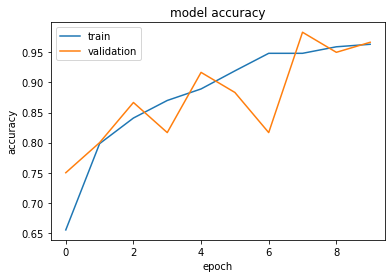

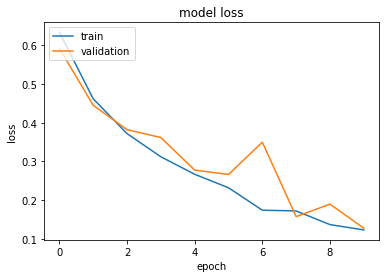

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          #cv2.putText(img, 'real:'+str(item), (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,))
          #cv2.putText(img, 'predict'+str(result), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,0))
          plt.imshow(ori)
          plt.show()

